# The Q Branch
<img src="https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/01/26/16/q-james-bond.jpg?w968h681" width="350px"/>

Welcome to the Q Branch! <a href="https://en.wikipedia.org/wiki/Q_(James_Bond)">Q</a> has graciously agreed to supply you with a number of useful ~~gadgets~~functions in order to solve the murder of Roger Castricum, as well as how to use them.

## Pandas

<a id='reading-in-data'></a>
### Reading in data

`pandas` has a convinient function to load in CSV (Comma Separated Values).

Use `pd.read_csv` to load in any CSV-formatted file.

In [6]:
import pandas as pd

In [55]:
# Load in an example dataset
example = pd.read_csv('../data/example/example.csv')

### Dataframes
A dataframe is an in-memory representation of a dataset, formatted nicely into columns and rows. In order to get an idea of what a dataframe looks like, use the `head` method and `shape` variable.

In [56]:
# Get the first five rows of data
example.head()

,name,major,grad_year,signed_up
0,george,data analytics,2019,11/05/2019 12:00:00
1,ashley,finance,2021,11/06/2019 3:00:00
2,charles,psychology,2019,11/03/2019 7:00:00
3,brian,english,2020,11/07/2019 4:30:00
4,hannah,architecture,2022,11/02/2019 2:20:00


In [59]:
# See the dimensions of the dataset (rows,columns)
example.shape

(5, 4)

### Series
A column in a dataframe is called a series.

In order to see a specific series in a dataframe, use the following syntax:

`<dataframe name>.<series name>`

In [10]:
# Access the 'name' series of the example dataset
example.name

0     george
1     ashley
2    charles
3      brian
4     hannah
Name: name, dtype: object

#### Series operations
Dataframe series have a number of useful methods for analyzing data. 

Use `value_counts()` on the `grad_year` series of the dataframe to get the counts of each value in the dataset.

In [58]:
# How many students in each grad year are there?
example.grad_year.value_counts()

2019    2
2022    1
2021    1
2020    1
Name: grad_year, dtype: int64

<a id='filtering'></a>
### Dataframe indexing/filtering

In order to select rows in a dataset where a condition applies, use the following syntax:

`<dataframe name>[<condition>]`

In [57]:
# Only see students whose graduation year is in 2019
example[example.grad_year == 2019]

,name,major,grad_year,signed_up
0,george,data analytics,2019,11/05/2019 12:00:00
2,charles,psychology,2019,11/03/2019 7:00:00


<a id='date-filtering'></a>
### Dataframe filtering: date filtering

In order to filter on a column that is a `datetime` type, use any operator you would usually use on another field. 

In [61]:
# In order to compare dates, you need to convert a column to a datetime type. 
# For more info on this, use `help(example.signed_up)`
example.signed_up = pd.to_datetime(example.signed_up)

# Get all rows where the person "signed up" after the 6th.
example[example.signed_up > '11/06/2019 12:00:00']

# Get all rows where the person "signed up" after the 3rd, 
# but before the 6th (at noon).
example[(example.signed_up > '11/03/2019 12:00:00') & (example.signed_up < '11/06/2019 12:00:00')]

,name,major,grad_year,signed_up
0,george,data analytics,2019,2019-11-05 12:00:00
1,ashley,finance,2021,2019-11-06 03:00:00


<a id='mapping'></a>
## Mapping

Plotly Express is a terse, consistent, high-level API for rapid data exploration and figure generation (basically the ggplot of Python). 

Plotly Express has a mapping function, `scatter_mapbox()`, which provides an easy interface for mapping data.

In [38]:
# Import plotly express and set the Mapbox API key
import plotly.express as px
MAPBOX_TOKEN = 'pk.eyJ1IjoiY3NtaXRoZHMiLCJhIjoiY2sydHR2Z3p0MG9uejNucWNzNnl0NmFjbSJ9.M37tPcq3O5s41bpXW0dDGw'
px.set_mapbox_access_token(MAPBOX_TOKEN)

Spatial data has one major components (which is two variables): GPS coordinates (latitude and longitude). 

In [47]:
example_gps = pd.read_csv('../data/example/example_gps.csv')
example_gps.head()

,lat,lon,location
0,39.999614,-83.012680,The Oval
1,40.001628,-83.019772,Ohio Stadium
2,39.997806,-83.009204,The Union
3,40.000658,-83.009655,Weigel Hall
4,40.003756,-83.015041,Hitchcock Hall


Plotting points on a map using `scatter_mapbox` is this easy!

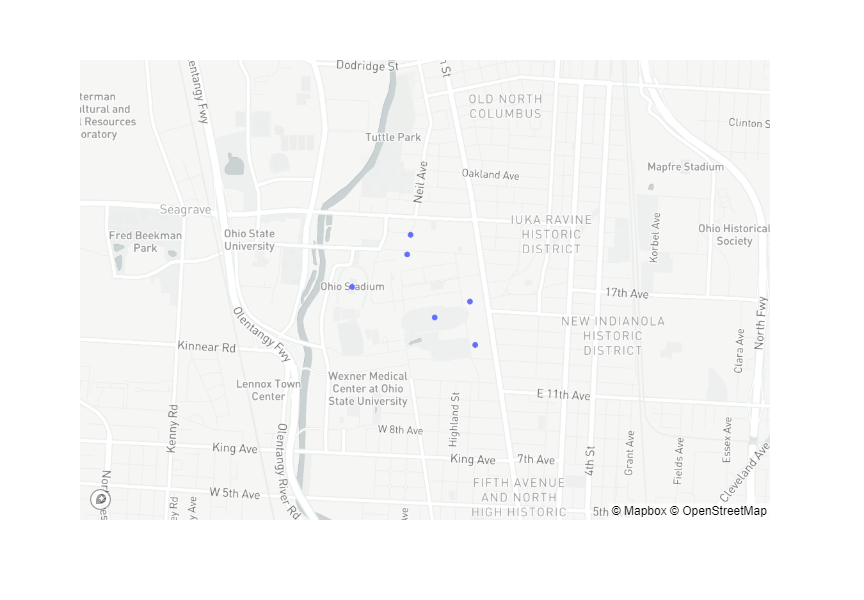

In [51]:
px.scatter_mapbox(
    example_gps,
    lat='lat',
    lon='lon',
    hover_name='location', # What column should the title in the hover box be?
    zoom=13 # How much should the map be "zoomed in"?
)

Take a look at `help(px.scatter_mapbox)` for more customization options.

In [52]:
help(px.scatter_mapbox)

Help on function scatter_mapbox in module plotly.express._chart_types:

scatter_mapbox(data_frame, lat=None, lon=None, color=None, text=None, hover_name=None, hover_data=None, size=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, color_discrete_sequence=None, color_discrete_map={}, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, size_max=None, zoom=8, title=None, template=None, width=None, height=None)
        In a Mapbox scatter plot, each row of `data_frame` is represented by a symbol mark on a Mapbox map.
        
    Arguments:
        data_frame: A 'tidy' `pandas.DataFrame`
        lat: (string: name of column in `data_frame`) Values from this column are used to position marks according to latitude on a map.
        lon: (string: name of column in `data_frame`) Values from this column are used to position marks according to longitude on a map.
        color: (string: name of column in `data_frame`) Values

<a id='random-forests'></a>
## Random Forests

The random forest is a classification algorithm consisting of many _decision trees_. A _decision tree_ is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

<img src="https://www.geeksforgeeks.org/wp-content/uploads/Decision_Tree-2.png" width="400px"/>

A random forest uses training data to make decisions on every variable you would like to use to predict an outcome. As an example, we will use the above example, training a random forest to predict whether I will play tennis on a given day.

Personally, I know that I will never play tennis on rainy days, and will generally play much more when I am in a good or neutral mood. However, sometimes, if it's a nice day, I will play even if I'm in a bad mood.

In [27]:
# Read in the data
tennis = pd.read_csv('../data/example/example_rf.csv')
tennis.head()

,temp,weather,mood,outcome
0,60,2,1,played tennis
1,70,0,2,did not play tennis
2,40,2,2,played tennis
3,50,0,0,did not play tennis
4,35,1,1,did not play tennis


Weather: 0 for rainy days, 1 for cloudy days, and 2 for sunny days.

Mood: 0 for bad, 1 for neutral, and 2 for good.

Let's see if a random forest agrees with my self assessment! Building a random forest to do this is relatively simple:

In [28]:
# Import the RandomForest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate a forest with 1000 decision trees
# `random_state` is a "seed" to produce reproducible results
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1870)

# Fit a random forest on our data
# X is the training data for the forest to learn about my habits
# y is the outcome variable, (i.e. what we want to predict)
rf.fit(
    X = tennis.drop('outcome', axis=1), 
    y = tennis.outcome
)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1870, verbose=0,
            warm_start=False)

Now, to predict! There is another file `example_rf_predict.csv` with 4 test cases to predict on. 

In [29]:
# Read in data to predict on
tennis_predict = pd.read_csv('../data/example/example_rf_predict.csv')
tennis_predict.head()

,temp,weather,mood
0,65,2,2
1,20,2,1
2,40,1,0
3,75,2,0


In [34]:
# Predict on the new data
rf.predict(tennis_predict)

array(['played tennis', 'did not play tennis', 'did not play tennis',
       'played tennis'], dtype=object)